In [6]:
import pandas as pd
from scipy.stats import ttest_ind
from scipy import stats

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv(r'C:\Users\usr\Documents\DataSci\Project\Reports\data\Train_SexAgeTIV.csv')
df = df.drop('site', axis = 1)
print(df.shape)
df.head()

(395, 5)


,ID,target,Sex,Age,TIV
0,ADHD_1003,ADHD,0,12.8,1523
1,ADHD_1005,ADHD,1,10.1,1598
2,ADHD_1006,ADHD,1,16.2,1284
3,ADHD_1008,ADHD,0,10.7,1750
4,ADHD_1009,ADHD,0,9.2,1517


In [8]:
df.target.value_counts(normalize=True)

target
ADHD    0.673418
hCon    0.326582
Name: proportion, dtype: float64

In [9]:
df['Age'].describe()

count    395.000000
mean      10.894684
std        3.137662
min        6.000000
25%        8.150000
50%       10.600000
75%       13.000000
max       20.700000
Name: Age, dtype: float64

In [10]:
df['TIV'].describe()

count     395.000000
mean     1529.065823
std       141.011504
min      1081.000000
25%      1442.500000
50%      1524.000000
75%      1619.500000
max      2102.000000
Name: TIV, dtype: float64

In [12]:
from fpdf import FPDF
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'Distributions of Age, Sex and Brain volume for ADHD patients and healthy controls\n \n1.)  Age')
pdf.output('01_Titel.pdf')

''

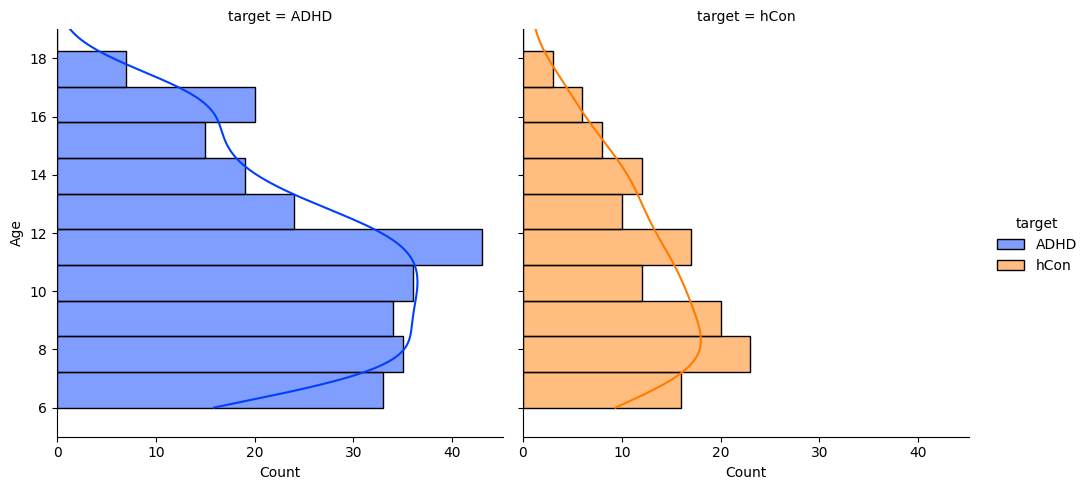

In [13]:
sns.displot(data=df, y='Age', col='target', hue='target', palette=sns.color_palette('bright')[:2], kde = True) 
plt.ylim([5, 19]);
plt.savefig("02_Figure1.pdf", format="pdf", bbox_inches="tight") 

In [14]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'On the left, age distribution of ADHD patients is presented, showing that the majority \n \nis between 6 and 11 years old. On the right, the age distribution of healthy controls \n \n shows a similar curve.')
pdf.output('03_Interpret_Age.pdf')

''

In [15]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'\n \nII  Sex')
pdf.output('04_Sex.pdf')

''

In [27]:
ADHD_males=df[(df['target']=='ADHD') & (df['Sex']==0)]
ADHD_m= ADHD_males['ID'].count()
ADHD_females=df[(df['target']=='ADHD') & (df['Sex']==1)]
ADHD_f= ADHD_females['ID'].count()
hCon_males=df[(df['target']=='hCon') & (df['Sex']==0)]
hCon_m= hCon_males['ID'].count()
hCon_females=df[(df['target']=='hCon') & (df['Sex']==1)]
hCon_f= hCon_females['ID'].count()
print('In patients sex ratio is', round(100*(ADHD_m/266), 2),'% vs.',  round(100*(ADHD_f/266), 2), 
      '%, in hCons', round(100*(hCon_m/129), 2),'% vs.', round(100*(hCon_f/129), 2), '%')

In patients sex ratio is 78.2 % vs. 21.8 %, in hCons 51.16 % vs. 48.84 %


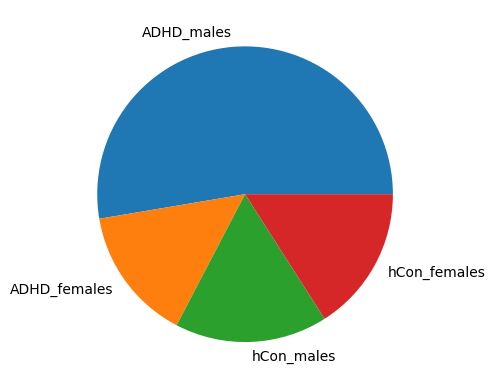

In [18]:
labels = 'ADHD_males', 'ADHD_females', 'hCon_males', 'hCon_females'
sizes = [ADHD_m, ADHD_f, hCon_m, hCon_f]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels);
plt.savefig("05_Figure2.pdf", format="pdf", bbox_inches="tight") 

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'Sex distribution differs between groups; whereas the ratio between males and \n \nfemales in the ADHD group is 75:25%, the ratio in healthy controls is almost 50:50%.')
pdf.output('06_interpret.pdf')

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'III  Brain Volume')
pdf.output('07_brain.pdf')

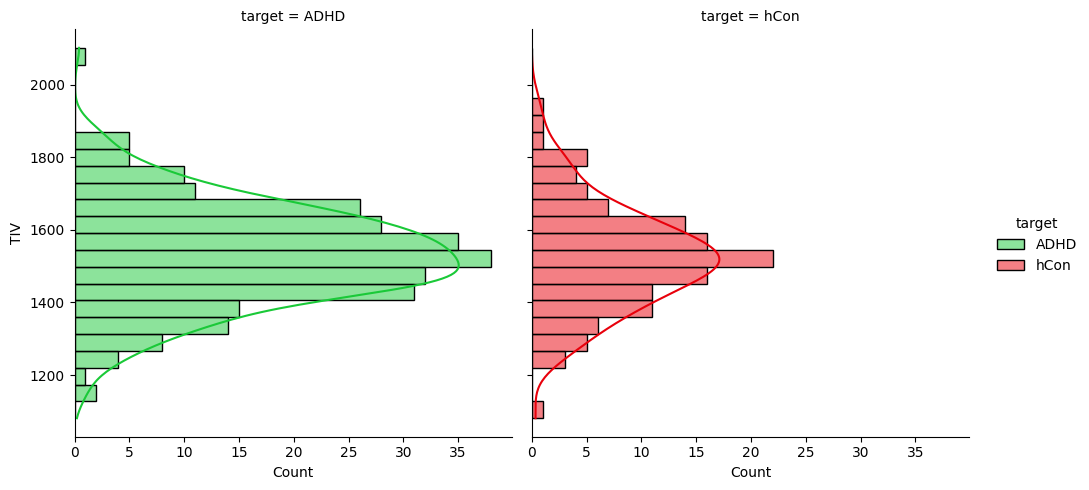

In [35]:
sns.displot(data=df, y='TIV', col='target', hue='target', palette=sns.color_palette('bright')[2:4], kde = True);
plt.savefig("08_Figure3.pdf", format="pdf", bbox_inches="tight") 

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'On the left, distribution of Brain Volume in ADHD patients is presented, showing a \n \npeak at 1500mm3. On the right, the distribution of Brain Volume in healthy controls \n \nshows a similar peak.')
pdf.output('09_inter.pdf')

In [36]:
df.target.replace({'ADHD': 1, 'hCon':-1}, inplace=True)
df.head(300)

,ID,target,Sex,Age,TIV
0,ADHD_1003,1,0,12.8,1523
1,ADHD_1005,1,1,10.1,1598
2,ADHD_1006,1,1,16.2,1284
3,ADHD_1008,1,0,10.7,1750
4,ADHD_1009,1,0,9.2,1517
...,...,...,...,...,...
295,hCon_1036,-1,1,8.7,1431
296,hCon_1037,-1,1,12.9,1334
297,hCon_1038,-1,0,13.4,1868
298,hCon_1039,-1,0,13.5,1629


In [ ]:
print('''Is there an age difference between patients and non-patients?''')
df.groupby(['target']).agg({'Age':['count', 'mean', 'std', 'min', 'max']})

In [37]:
group1 = df[df['target']==1]
group2 = df[df['target']==-1]
Ttest = ttest_ind(group1['Age'], group2['Age'])
print('With T(393,2)=', round(Ttest[0], 2), 'and p= ', round(Ttest[1], 3), 'ADHD patients and healthy controls do not differ in age.')

With T(393,2)= 0.4 and p=  0.689 ADHD patients and healthy controls do not differ in age.


In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'Results from statistical tests: \n\nT(age)= 0.4, p= 0.689, no significant age difference. \n\nT(TIV)= 0.6, p= 0.578, no significant difference in brain volume \n\nChi-Square(sex)=28.1, p=.000, sex distribution differs significantly')
pdf.output('10_Zusammen.pdf')

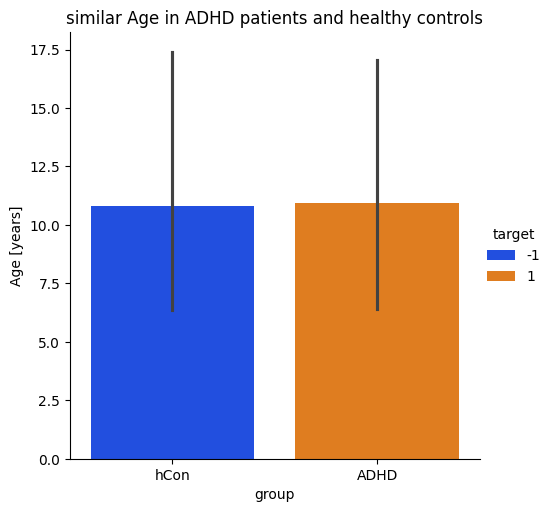

In [38]:
sns.catplot(data = df, x = 'target', y = 'Age', kind = 'bar', hue = 'target', palette=sns.color_palette('bright')[:2], errorbar='pi')
plt.title('similar Age in ADHD patients and healthy controls')
plt.xlabel('group')
plt.ylabel('Age [years]')
plt.xticks([0,1], ['hCon', 'ADHD']);
plt.savefig("11_Figure4.pdf", format="pdf", bbox_inches="tight") 

In [31]:
print('Does the total Brain Volume differ between patients and non-patients')
df.groupby(['target']).agg({'TIV':['mean', 'std', 'min', 'max']})

Does the total Brain Volume differ between patients and non-patients


TIV                        
               mean         std   min   max
target                                     
ADHD    1531.815789  138.341579  1148  2102
hCon    1523.395349  146.750182  1081  1949

In [39]:
group1 = df[df['target']==1]
group2 = df[df['target']==-1]
Ttest = ttest_ind(group1['TIV'], group2['TIV'])
print('With T(393,2)=', round(Ttest[0], 1), 'and p= ', round(Ttest[1], 3), 'ADHD patients and healthy controls do not differ in brain volume')

With T(393,2)= 0.6 and p=  0.578 ADHD patients and healthy controls do not differ in brain volume


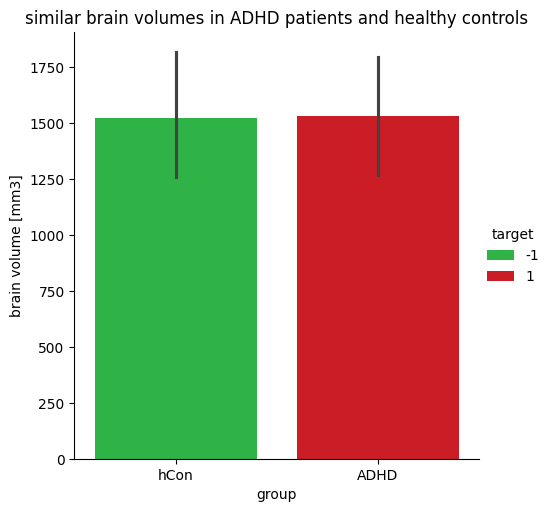

In [44]:
sns.catplot(data = df, x = 'target', y = 'TIV', kind = 'bar', hue = 'target', palette=sns.color_palette('bright')[2:4], errorbar='pi')
plt.title('similar brain volumes in ADHD patients and healthy controls')
plt.xlabel('group')
plt.ylabel('brain volume [mm3]')
plt.xticks([0,1], ['hCon', 'ADHD']);
plt.savefig("12_Figure5.pdf", format="pdf", bbox_inches="tight") 

In [41]:
print('Does sex distribution differ between patients and non-patients?')
print('Across all training subjects the sex distribution is', df['Sex'].value_counts(normalize=True))

Does sex distribution differ between patients and non-patients?
Across all training subjects the sex distribution is Sex
0    0.693671
1    0.306329
Name: proportion, dtype: float64


In [42]:
crosstab = pd.crosstab(df['target'], df['Sex'])
chi = stats.chi2_contingency(crosstab)
print('With Chi-Square(394,1)=', round(chi[0], 1), 'and p=.000, the sex ratio differs significantly between patients and non-patients.')

With Chi-Square(394,1)= 28.6 and p=.000, the sex ratio differs significantly between patients and non-patients.


Across all subjects, brain volume significantly correlates with age PearsonRResult(statistic=0.16015383683567502, pvalue=0.0014053752620532911)


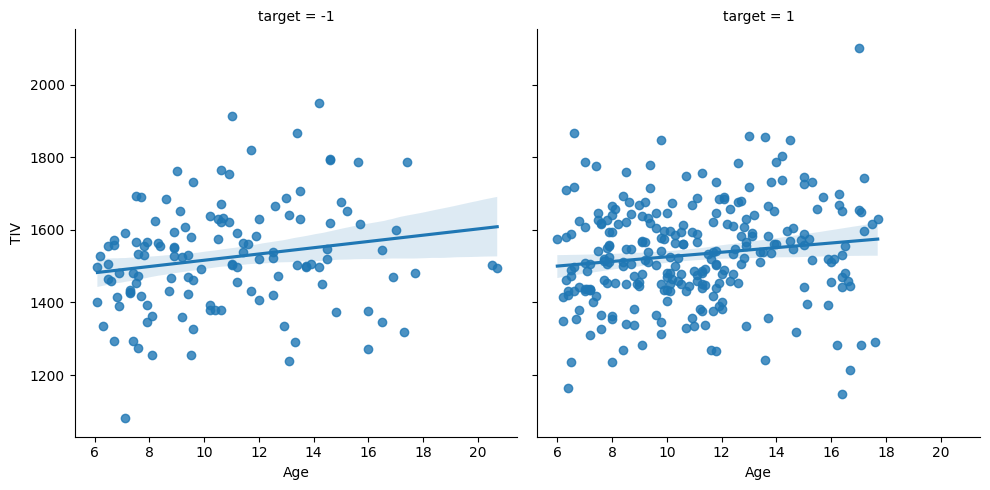

In [43]:
import scipy.stats
print('Across all subjects, brain volume significantly correlates with age', scipy.stats.pearsonr(df.Age, df.TIV))
sns.lmplot(data=df, x="Age", y="TIV", col="target");
plt.savefig("14_Figure7.pdf", format="pdf", bbox_inches="tight") 
#print('Across all subjects, brain volume significantly correlates with age', scipy.stats.pearsonr(df.Age, df.TIV))

In [ ]:
df_ADHD = df[df['target']==1]
df_hCon = df[df['target']!=1]
# print('In ADHD patients, brain volume significantly correlates with age, R=', round(stats.pearsonr(df_ADHD.Age, df_ADHD.TIV).statistic,2), ', p=',round(stats.pearsonr(df_ADHD.Age, df_ADHD.TIV).pvalue,3))
# print('In healthy controls, brain volume did not correlate with age, R=', round(stats.pearsonr(df_hCon.Age, df_hCon.TIV).statistic,2), ', p=', round(stats.pearsonr(df_hCon.Age, df_hCon.TIV).pvalue,3))

#pdf = FPDF()
#pdf.add_page()
#pdf.set_font("Arial", size = 14)
#pdf.write(4,'In ADHD patients, brain volume significantly correlates with age, R= 0.14 , p= 0.022. \n \n In healthy controls, brain volume did not correlate with age, R= 0.19 , p= 0.028')
#pdf.output('15_Corr.pdf')      


In [ ]:
group1 = df_ADHD[df_ADHD['Sex']==0]
group2 = df_ADHD[df_ADHD['Sex']==1]
Ttest = ttest_ind(group1['TIV'], group2['TIV'])
print('With T(264,2)=', round(Ttest[0], 1), 'and p= ', round(Ttest[1], 3), 'in ADHD patients, brain volume significantly differed between sexes.')

In [ ]:
group1 = df_hCon[df_hCon['Sex']==0]
group2 = df_hCon[df_hCon['Sex']==1]
Ttest = ttest_ind(group1['TIV'], group2['TIV'])
print('With T(264,2)=', round(Ttest[0], 1), 'and p= ', round(Ttest[1], 3), 'in ADHD patients, brain volume significantly differed between sexes.')

In [ ]:
pdf = FPDF()
pdf.add_page()
pdf.set_font("Arial", size = 14)
pdf.write(4,'In both, ADHD patients and healthy controls, brain volume differed significantly between sexes \n \n (ADHD: T=6.9, p=.000, hCon: T=6.4, p=.000), brain volume significantly correlates with age, R= 0.14 , p= 0.022. \n \n In healthy controls, brain volume did not correlate with age, R= 0.19 , p= 0.028')
pdf.output('16_Sex.pdf') 

In [ ]:
from pypdf import PdfMerger

pdfs = ['01_Titel.pdf', '02_Figure1.pdf', '03_Interpret_Age.pdf', '04_Sex.pdf', '05_Figure2, ]

merger = PdfMerger()

for pdf in pdfs:
    merger.append(pdf)

merger.write("result.pdf")
merger.close()